## Capstone Project – The Battle of Neighborhoods Finding a Better Place in Surabaya, Indonesia

Import libraries

In [1]:
import pandas as pd

import requests

import numpy as np 

import json 

from geopy.geocoders import Nominatim 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

Load dataset

In [2]:
df_surabaya = pd.read_csv('Surabaya_Districts_Coordinates.csv')
df_surabaya.head()

,Neighborhood,Latitude,Longitude
0,Asemrowo,-7.234688,112.685417
1,Benowo,-7.226500,112.649700
2,Bubutan,-7.249962,112.730110
3,Bulak,-7.236800,112.789700
4,Dukuh Pakis,-7.296800,112.700300


Get the geographical coordinates of Surabaya.

In [4]:
address = 'Surabaya, Indonesia'

geolocator = Nominatim(user_agent="surabaya_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Surabaya are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Surabaya are -7.2459717, 112.7378266.


Visualize the Surabaya neighbors in a map.

In [5]:
map_surabaya = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_surabaya['Latitude'], df_surabaya['Longitude'], df_surabaya['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_surabaya)  
    
map_surabaya

Define Foursquare credentials and version.

In [28]:
CLIENT_ID = ' ' # your Foursquare ID
CLIENT_SECRET = ' ' # your Foursquare Secret
VERSION = ' ' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#### Explore Neighborhoods in Surabaya

Function to retrieve top venues for each neighborhood in Surabaya.

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

With the function, create a new dataframe called 'surabaya_venues'.

In [8]:
surabaya_venues = getNearbyVenues(names=df_surabaya['Neighborhood'],
                                   latitudes=df_surabaya['Latitude'],
                                   longitudes=df_surabaya['Longitude']
                                  )

Asemrowo
Benowo
Bubutan
Bulak
Dukuh Pakis
Gayungan
Genteng
Gubeng
Gunung Anyar
Jambangan
Karang Pilang
Kenjeran
Krembangan
Lakarsantri
Mulyorejo
Pabean Cantian
Pakal
Rungkut
Sambikerep
Sawahan
Semampir
Simokerto
Sukolilo
Sukomanunggal
Tambaksari
Tandes
Tegalsari
Tenggilis Mejoyo
Wiyung
Wonocolo
Wonokromo


Check the resulting dataframe and shape.

In [9]:
print(surabaya_venues.shape)
surabaya_venues.head()

(216, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Benowo,-7.226500,112.64970,"Benowo Trade Centre [ BTC ], Benowo, Surabaya",-7.225492,112.648972,Shoe Store
1,Benowo,-7.226500,112.64970,Warung Belut Benowo,-7.222692,112.649805,Breakfast Spot
2,Bubutan,-7.249962,112.73011,Kampoeng Ilmu,-7.251933,112.728690,Bookstore
3,Bubutan,-7.249962,112.73011,Dunkin',-7.248629,112.730910,Donut Shop
4,Bubutan,-7.249962,112.73011,Pasar Turi,-7.246576,112.732809,Market


Check how many venues were returned for each neighborhood.

In [10]:
surabaya_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Benowo,2,2,2,2,2,2
Bubutan,11,11,11,11,11,11
Bulak,1,1,1,1,1,1
Dukuh Pakis,1,1,1,1,1,1
Gayungan,9,9,9,9,9,9
Genteng,23,23,23,23,23,23
Gubeng,25,25,25,25,25,25
Gunung Anyar,1,1,1,1,1,1
Jambangan,7,7,7,7,7,7


Find out how many unique categories can be curated from all the returned venues.

In [11]:
print('There are {} uniques categories.'.format(len(surabaya_venues['Venue Category'].unique())))

There are 82 uniques categories.


#### Analyze each neighborhood.

In [12]:
# one hot encoding
surabaya_onehot = pd.get_dummies(surabaya_venues[['Venue Category']], prefix="", prefix_sep=" ")

# add neighborhood column back to dataframe
surabaya_onehot['Neighborhood'] = surabaya_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [surabaya_onehot.columns[-1]] + list(surabaya_onehot.columns[:-1])
surabaya_onehot = surabaya_onehot[fixed_columns]

surabaya_onehot.head()

,Neighborhood,Airport Terminal,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,Bakery,Balinese Restaurant,Basketball Court,Bed & Breakfast,...,Shopping Mall,Soccer Field,Soup Place,Spa,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Toll Booth,Vegetarian / Vegan Restaurant
0,Benowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Benowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bubutan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bubutan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bubutan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
surabaya_onehot.shape

(216, 83)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [14]:
surabaya_grouped = surabaya_onehot.groupby('Neighborhood').mean().reset_index()
surabaya_grouped.head()

,Neighborhood,Airport Terminal,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,Bakery,Balinese Restaurant,Basketball Court,Bed & Breakfast,...,Shopping Mall,Soccer Field,Soup Place,Spa,Steakhouse,Sundanese Restaurant,Supermarket,Sushi Restaurant,Toll Booth,Vegetarian / Vegan Restaurant
0,Benowo,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Bubutan,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Bulak,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Dukuh Pakis,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Gayungan,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0


Write a function to sort the venues in descending order.

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood.

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = surabaya_grouped['Neighborhood']

for ind in np.arange(surabaya_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(surabaya_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Benowo,Shoe Store,Breakfast Spot,Flea Market,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
1,Bubutan,Coffee Shop,Convenience Store,Fast Food Restaurant,Discount Store,Market,Food Truck,Food Court,Donut Shop,Shopping Mall,Bookstore
2,Bulak,Gift Shop,Vegetarian / Vegan Restaurant,Flea Market,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
3,Dukuh Pakis,Mobile Phone Shop,Vegetarian / Vegan Restaurant,Cosmetics Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
4,Gayungan,Convenience Store,Steakhouse,Food Truck,Bakery,Café,Seafood Restaurant,Indonesian Restaurant,Boutique,Pizza Place,Vegetarian / Vegan Restaurant


### Cluster neighborhoods

Run k-means to cluster the neighborhood into 3 clusters.

In [17]:
# set number of clusters
kclusters = 3

surabaya_grouped_clustering = surabaya_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(surabaya_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [18]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

surabaya_merged = df_surabaya[['Neighborhood', 'Latitude', 'Longitude']]

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
surabaya_merged = surabaya_merged.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
surabaya_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Benowo,-7.226500,112.649700,1,Shoe Store,Breakfast Spot,Flea Market,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
1,Bubutan,-7.249962,112.730110,1,Coffee Shop,Convenience Store,Fast Food Restaurant,Discount Store,Market,Food Truck,Food Court,Donut Shop,Shopping Mall,Bookstore
2,Bulak,-7.236800,112.789700,1,Gift Shop,Vegetarian / Vegan Restaurant,Flea Market,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
3,Dukuh Pakis,-7.296800,112.700300,1,Mobile Phone Shop,Vegetarian / Vegan Restaurant,Cosmetics Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
4,Gayungan,-7.330800,112.724200,1,Convenience Store,Steakhouse,Food Truck,Bakery,Café,Seafood Restaurant,Indonesian Restaurant,Boutique,Pizza Place,Vegetarian / Vegan Restaurant
5,Genteng,-7.259088,112.747986,1,Coffee Shop,Multiplex,Fried Chicken Joint,Indonesian Restaurant,Soup Place,Bed & Breakfast,Furniture / Home Store,Noodle House,Buffet,Bistro
6,Gubeng,-7.278906,112.753945,1,Indonesian Restaurant,Food Truck,Bakery,Chinese Restaurant,Multiplex,Padangnese Restaurant,Electronics Store,Juice Bar,Diner,Kids Store
7,Gunung Anyar,-7.339200,112.804600,2,Convenience Store,Cosmetics Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Flea Market
8,Jambangan,-7.321100,112.718200,1,Coffee Shop,Airport Terminal,Javanese Restaurant,Sundanese Restaurant,Indonesian Restaurant,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant
9,Karang Pilang,-7.337800,112.688400,1,Toll Booth,Flea Market,Cupcake Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant


Visualize the resulting clusters in map.

In [19]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(surabaya_merged['Latitude'], surabaya_merged['Longitude'], surabaya_merged['Neighborhood'], surabaya_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

Cluster 0 : areas dominated by pool.

In [22]:
surabaya_merged[surabaya_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Lakarsantri,-7.316514,112.661581,0,Pool,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Cupcake Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store


Cluster 1 : areas dominated by Indonesian restaurant.

In [23]:
surabaya_merged[surabaya_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Benowo,-7.226500,112.649700,1,Shoe Store,Breakfast Spot,Flea Market,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
1,Bubutan,-7.249962,112.730110,1,Coffee Shop,Convenience Store,Fast Food Restaurant,Discount Store,Market,Food Truck,Food Court,Donut Shop,Shopping Mall,Bookstore
2,Bulak,-7.236800,112.789700,1,Gift Shop,Vegetarian / Vegan Restaurant,Flea Market,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
3,Dukuh Pakis,-7.296800,112.700300,1,Mobile Phone Shop,Vegetarian / Vegan Restaurant,Cosmetics Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
4,Gayungan,-7.330800,112.724200,1,Convenience Store,Steakhouse,Food Truck,Bakery,Café,Seafood Restaurant,Indonesian Restaurant,Boutique,Pizza Place,Vegetarian / Vegan Restaurant
5,Genteng,-7.259088,112.747986,1,Coffee Shop,Multiplex,Fried Chicken Joint,Indonesian Restaurant,Soup Place,Bed & Breakfast,Furniture / Home Store,Noodle House,Buffet,Bistro
6,Gubeng,-7.278906,112.753945,1,Indonesian Restaurant,Food Truck,Bakery,Chinese Restaurant,Multiplex,Padangnese Restaurant,Electronics Store,Juice Bar,Diner,Kids Store
8,Jambangan,-7.321100,112.718200,1,Coffee Shop,Airport Terminal,Javanese Restaurant,Sundanese Restaurant,Indonesian Restaurant,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant
9,Karang Pilang,-7.337800,112.688400,1,Toll Booth,Flea Market,Cupcake Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant
10,Kenjeran,-7.220300,112.768800,1,Mosque,Vegetarian / Vegan Restaurant,Cosmetics Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant


Cluster 2 : areas dominated by convenience store.

In [24]:
surabaya_merged[surabaya_merged['Cluster Labels'] == 2]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Gunung Anyar,-7.3392,112.8046,2,Convenience Store,Cosmetics Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Flea Market
11,Krembangan,-7.2301,112.7242,2,Convenience Store,Diner,Cosmetics Shop,Dim Sum Restaurant,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Flea Market


We can also estimate the number of 1st Most Common Venue in each cluster.Thus, we can create a bar chart which may help us to find proper label names for each cluster.

In [25]:
count_venue = surabaya_merged
count_venue = count_venue.drop(['Neighborhood', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Bakery,Campground,Coffee Shop,Convenience Store,Cupcake Shop,Dim Sum Restaurant,Flea Market,Food Court,Food Truck,Gift Shop,Indonesian Restaurant,Mobile Phone Shop,Mosque,Pool,Restaurant,Shoe Store,Soccer Field,Toll Booth
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,3,3,1,1,1,1,1,1,5,1,1,0,2,1,1,1
2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Clusters')

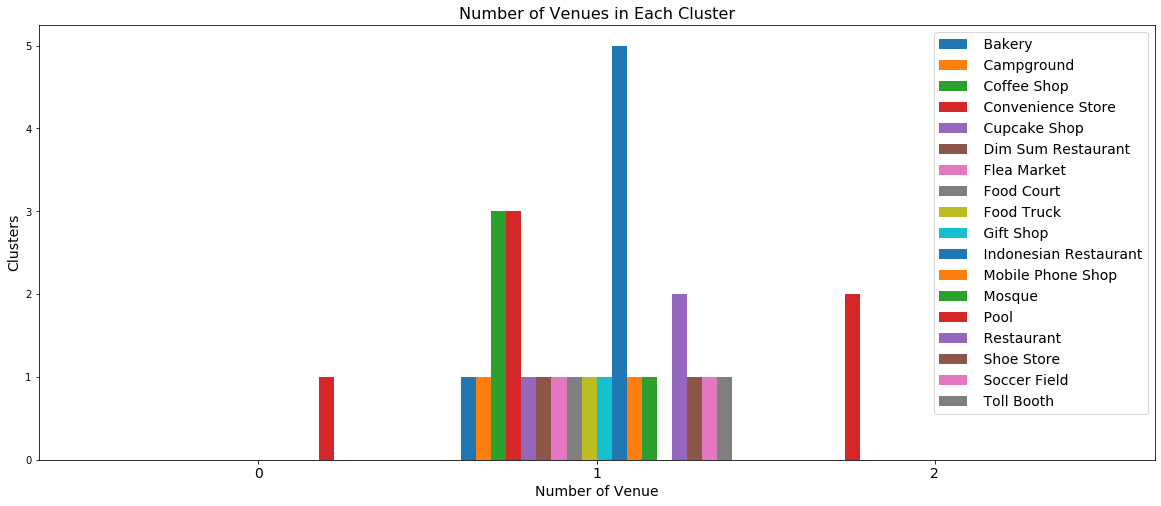

In [27]:
import matplotlib.pyplot as plt

frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)